---
title: "MIT 18.06SC Lecture 1: The Geometry of Linear Equations"
format: 
    html:
        code-fold: true
        code-line-numbers: true
jupyter: python3
---

This is for MIT 18.06SC Lecture 1, covering how to understand linear systems from two perspectives: geometry (row picture) and algebra (column picture).

{{< video https://www.youtube.com/watch?v=J7DzL2_Na80 >}}

## The Example System

Let's work with this concrete example:

$$\begin{align}
x + 2y &= 5 \\
3x + 4y &= 6
\end{align}$$

In matrix form:
$$\begin{bmatrix}1 & 2 \\ 3 & 4\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}5 \\ 6\end{bmatrix}$$

We can interpret this system in two completely different ways.

## Row Picture (Geometry)

In the **row picture**, each equation represents a geometric object:
- In 2D: each equation is a **line**
- In 3D: each equation is a **plane**  
- In higher dimensions: each equation is a **hyperplane**

The solution is where all these objects intersect.

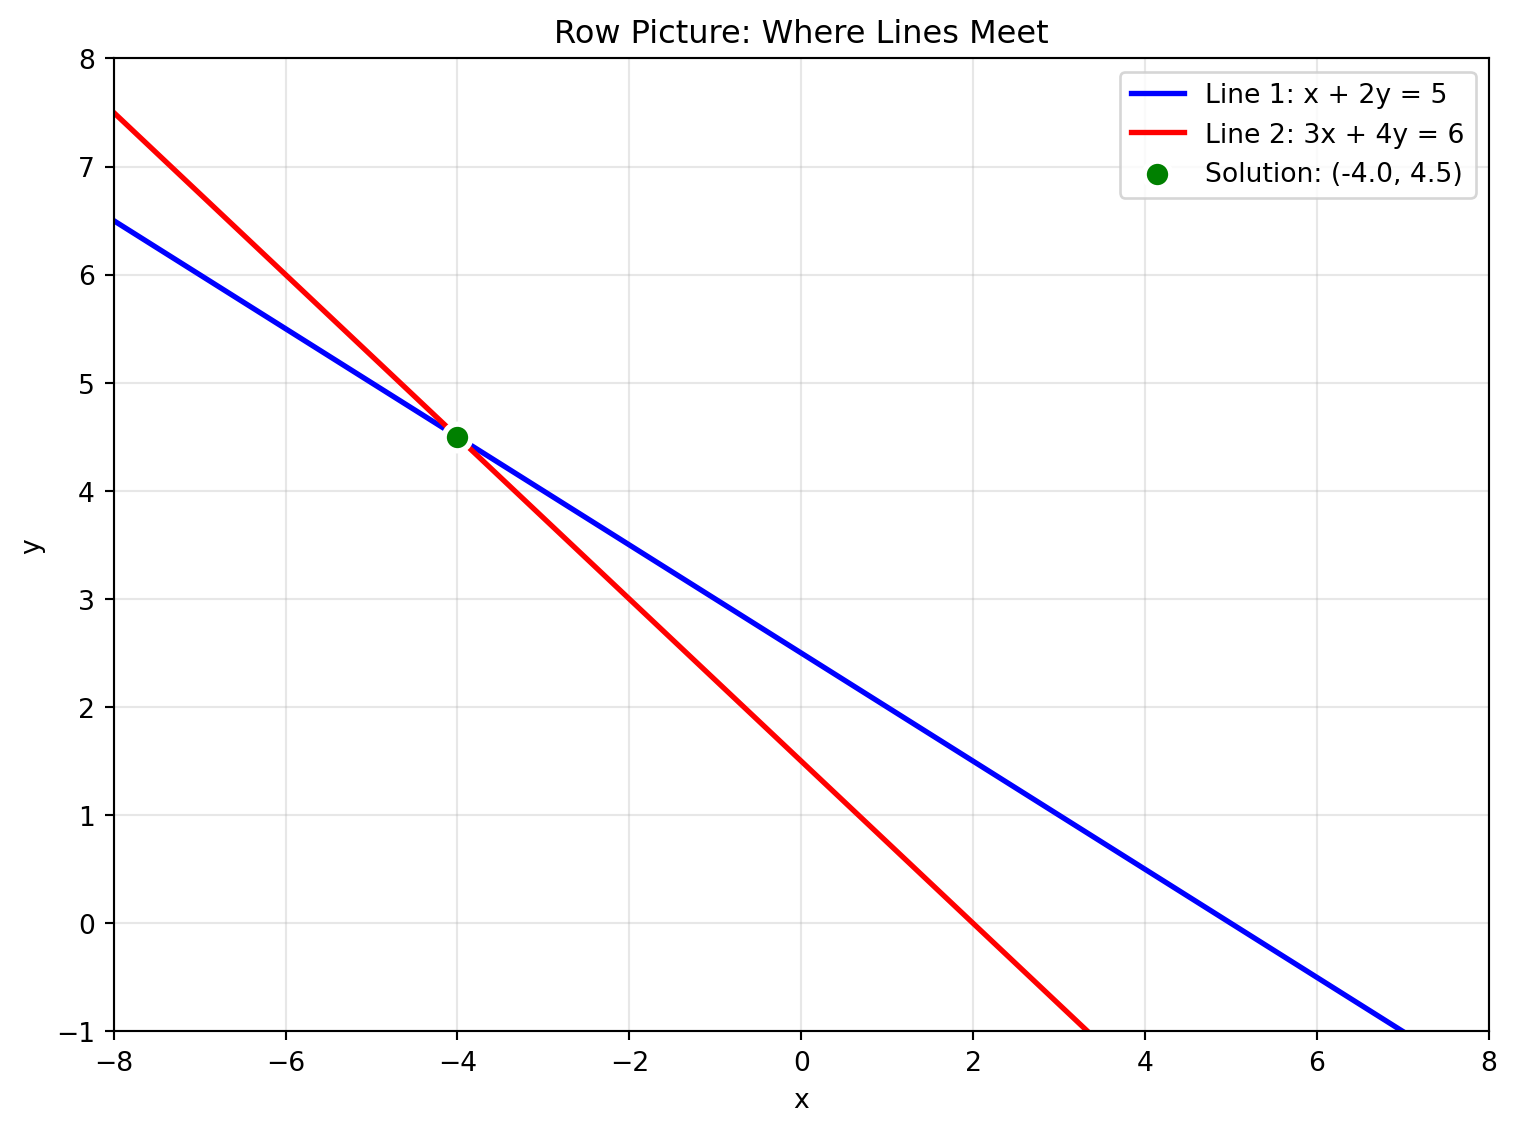

Solution: x = -4.000, y = 4.500
Verification: [5. 6.] equals [5 6]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equations in the form y = mx + c
# Line 1: x + 2y = 5  =>  y = -1/2*x + 5/2
# Line 2: 3x + 4y = 6  =>  y = -3/4*x + 3/2
x = np.linspace(-10, 10, 100)
y1 = -1/2 * x + 5/2
y2 = -3/4 * x + 3/2

# Solve for intersection point
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
solution = np.linalg.solve(A, b)

# Plot both lines and intersection
plt.figure(figsize=(8, 6))
plt.plot(x, y1, 'b-', label='Line 1: x + 2y = 5', linewidth=2)
plt.plot(x, y2, 'r-', label='Line 2: 3x + 4y = 6', linewidth=2)
plt.scatter(solution[0], solution[1], color='green', s=100, zorder=5, 
           label=f'Solution: ({solution[0]:.1f}, {solution[1]:.1f})', edgecolor='white', linewidth=2)

plt.xlim(-8, 8)
plt.ylim(-1, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Row Picture: Where Lines Meet')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Solution: x = {solution[0]:.3f}, y = {solution[1]:.3f}")
print(f"Verification: {A @ solution} equals {b}")

## Column Picture (Algebra)

The **column picture** reframes the same system as a question about **vector combinations**:

$$x \begin{bmatrix}1 \\ 3\end{bmatrix} + y \begin{bmatrix}2 \\ 4\end{bmatrix} = \begin{bmatrix}5 \\ 6\end{bmatrix}$$

Instead of asking "where do lines intersect?", we ask: "Can we combine these vectors to reach our target?"

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Question: Can we write b as a linear combination of a₁ and a₂?
Answer: -4.000 × a₁ + 4.500 × a₂ = b
Verification: [ -4. -12.] + [ 9. 18.] = [5. 6.]


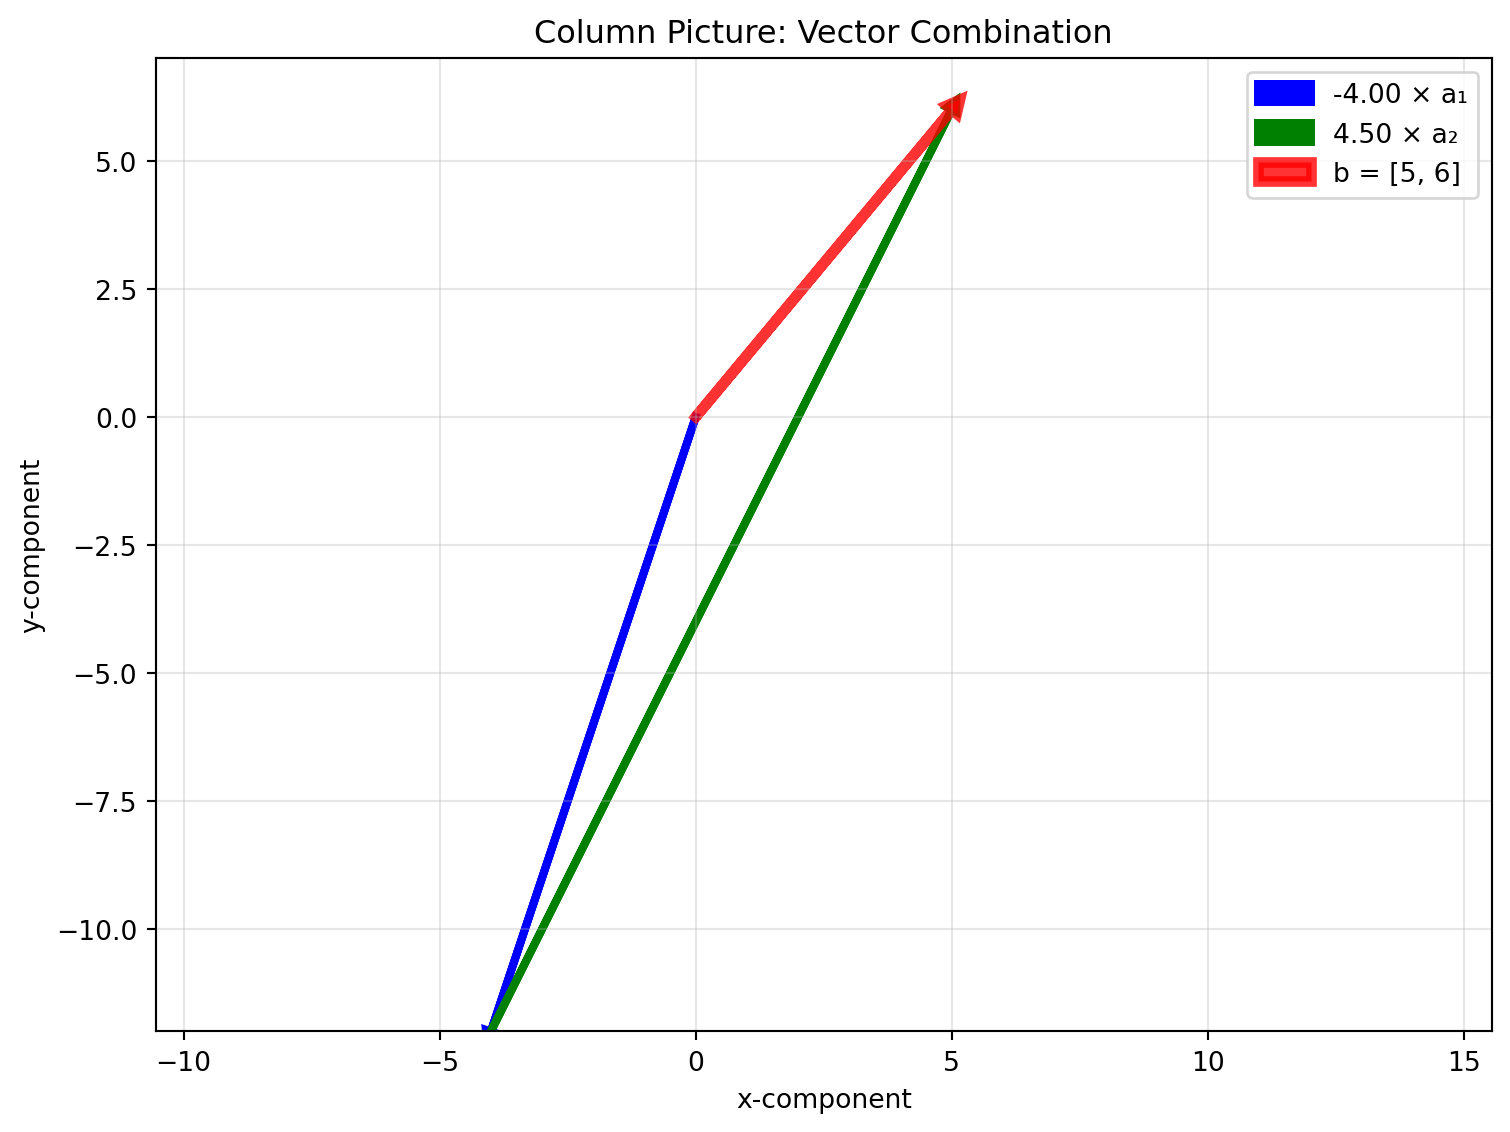

In [2]:
# Define column vectors and target vector
a1 = np.array([1, 3])
a2 = np.array([2, 4])
b = np.array([5, 6])

# Solve for coefficients
A = np.column_stack([a1, a2])
solution = np.linalg.solve(A, b)
x, y = solution[0], solution[1]

print(f"Question: Can we write b as a linear combination of a₁ and a₂?")
print(f"Answer: {x:.3f} × a₁ + {y:.3f} × a₂ = b")
print(f"Verification: {x*a1} + {y*a2} = {x*a1 + y*a2}")

# Visualize the vector construction
plt.figure(figsize=(8, 6))

# Step 1: Draw x*a1 (scaled version)
plt.arrow(0, 0, x*a1[0], x*a1[1], head_width=0.2, head_length=0.2, 
         fc='blue', ec='blue', linewidth=3,
         label=f'{x:.2f} × a₁')

# Step 2: Draw y*a2 starting from the tip of x*a1
plt.arrow(x*a1[0], x*a1[1], y*a2[0], y*a2[1], head_width=0.2, head_length=0.2, 
         fc='green', ec='green', linewidth=3,
         label=f'{y:.2f} × a₂')

# Show final result vector b
plt.arrow(0, 0, b[0], b[1], head_width=0.25, head_length=0.25, 
         fc='red', ec='red', linewidth=4, alpha=0.8,
         label=f'b = [{b[0]}, {b[1]}]')

plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-1, 6)
plt.ylim(-12, 7)
plt.xlabel('x-component')
plt.ylabel('y-component')
plt.title('Column Picture: Vector Combination')
plt.legend()
plt.tight_layout()
plt.show()

## Three Types of Linear Systems

Linear systems can have three possible outcomes:

1. **Unique solution** - Lines intersect at one point
2. **No solution** - Lines are parallel (don't intersect)
3. **Infinitely many solutions** - Lines are the same (overlap completely)

In [3]:
# Case (a): Unique solution - non-parallel vectors
print("🎯 Case (a) - Unique Solution:")
A_a = np.array([[1, 2], [3, 4]])
b_a = np.array([5, 6])
solution_a = np.linalg.solve(A_a, b_a)
det_a = np.linalg.det(A_a)
print(f"   Solution: {solution_a}")
print(f"   Matrix determinant: {det_a:.3f} ≠ 0 → linearly independent columns")
print(f"   Column space: ENTIRE 2D plane (any point reachable)")

# Case (b): No solution - parallel vectors, b not in span
print(f"\n❌ Case (b) - No Solution:")
A_b = np.array([[1, 2], [2, 4]])  # Columns are parallel
b_b = np.array([5, 6])            # b not in span
det_b = np.linalg.det(A_b)
print(f"   Matrix determinant: {det_b:.3f} = 0 → linearly dependent columns")
print(f"   Column space: 1D line only (most points unreachable)")
print(f"   Target b = {b_b} is NOT on the line → No solution exists")

# Case (c): Infinitely many solutions - parallel vectors, b in span
print(f"\n♾️  Case (c) - Infinitely Many Solutions:")
A_c = np.array([[1, 2], [2, 4]])  # Same parallel columns
b_c = np.array([3, 6])            # b = 3 * [1, 2], so b is in span
det_c = np.linalg.det(A_c)
print(f"   Matrix determinant: {det_c:.3f} = 0 → linearly dependent columns")
print(f"   Column space: 1D line only")
print(f"   Target b = {b_c} IS on the line → Infinite solutions exist")

# Find one particular solution using pseudoinverse
solution_c = np.linalg.pinv(A_c) @ b_c
print(f"   One particular solution: {solution_c}")
print(f"   Other solutions: {solution_c} + t×[2, -1] for any real number t")

🎯 Case (a) - Unique Solution:
   Solution: [-4.   4.5]
   Matrix determinant: -2.000 ≠ 0 → linearly independent columns
   Column space: ENTIRE 2D plane (any point reachable)

❌ Case (b) - No Solution:
   Matrix determinant: 0.000 = 0 → linearly dependent columns
   Column space: 1D line only (most points unreachable)
   Target b = [5 6] is NOT on the line → No solution exists

♾️  Case (c) - Infinitely Many Solutions:
   Matrix determinant: 0.000 = 0 → linearly dependent columns
   Column space: 1D line only
   Target b = [3 6] IS on the line → Infinite solutions exist
   One particular solution: [0.6 1.2]
   Other solutions: [0.6 1.2] + t×[2, -1] for any real number t


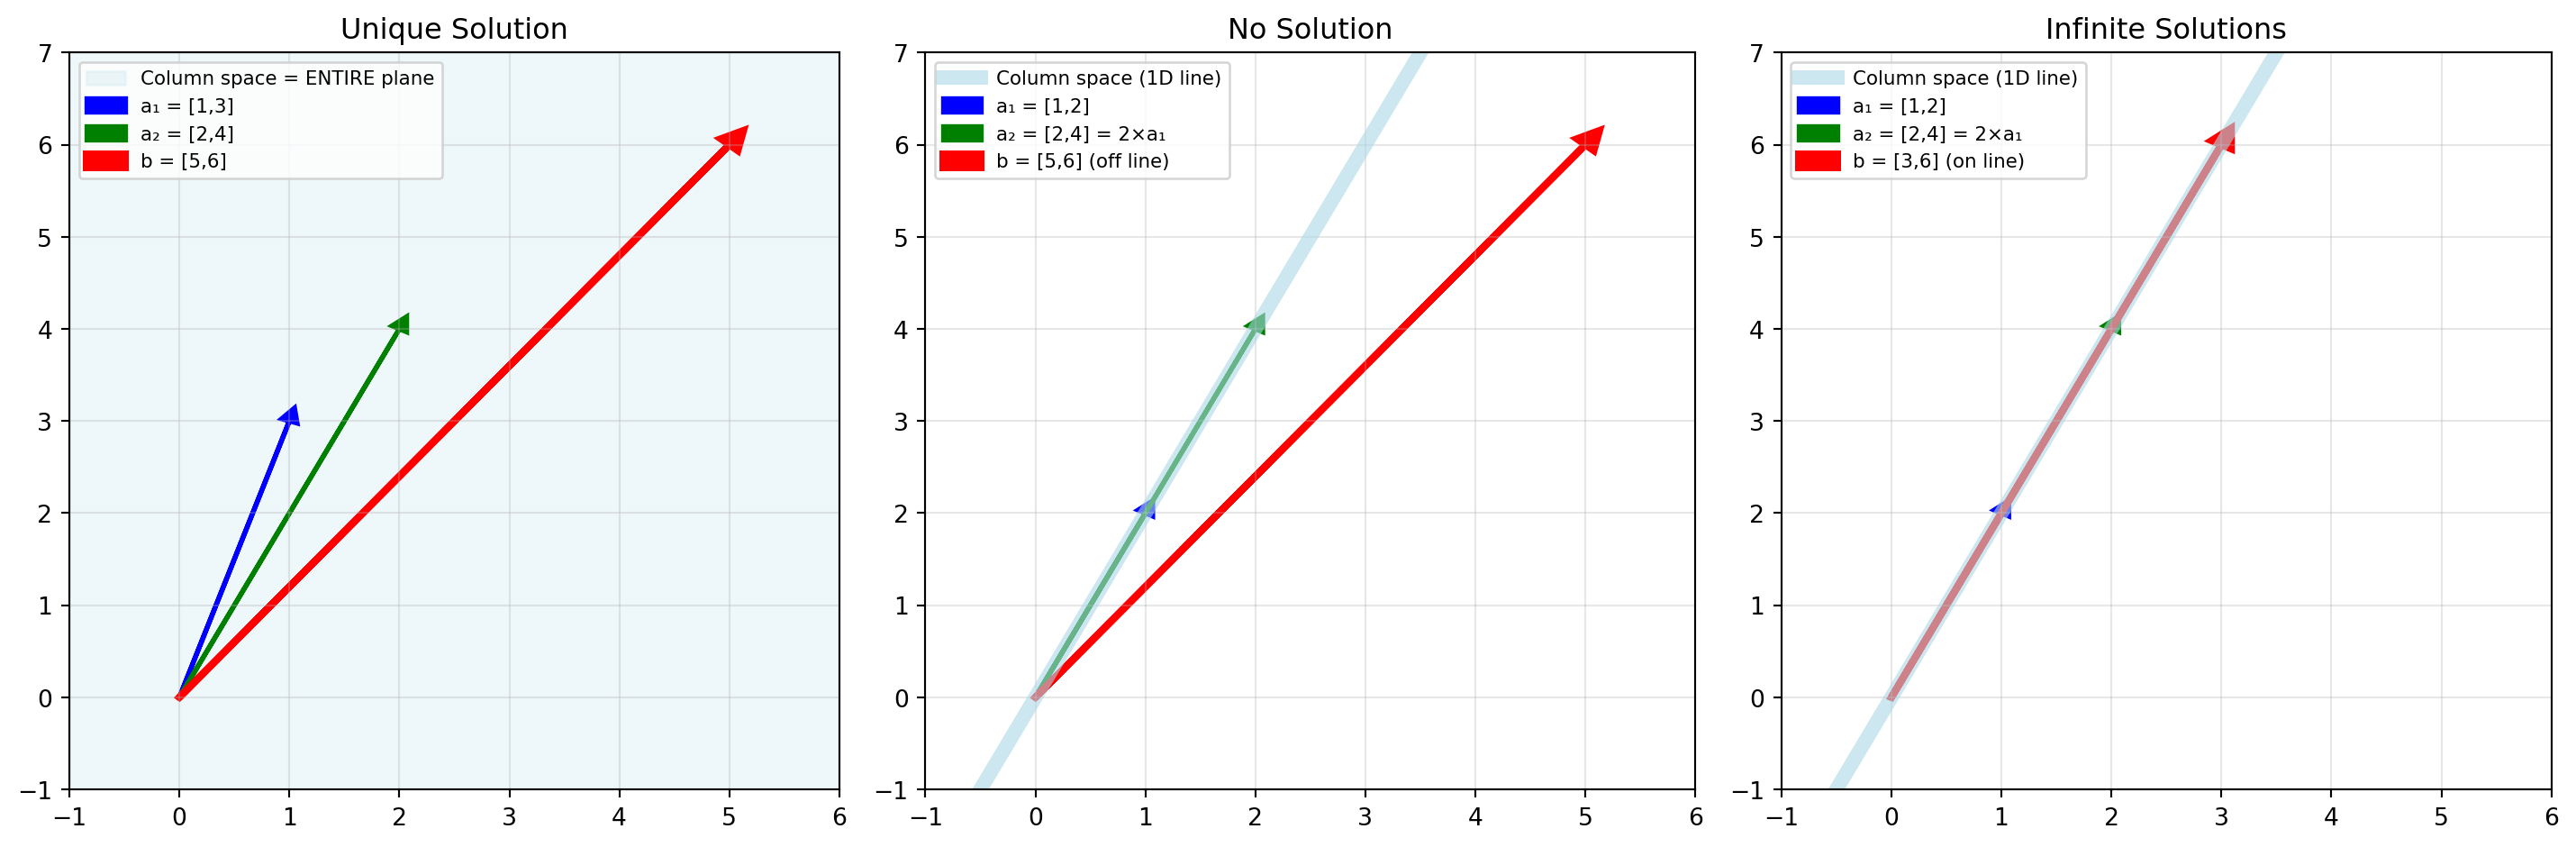

Key insight: Solution depends on whether target vector b lies in the column space


In [4]:
# Visualize all three cases
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Case (a): Unique solution
ax = axes[0]
ax.fill_between([-1, 6], [-1, -1], [7, 7], color='lightblue', alpha=0.2, 
                label='Column space = ENTIRE plane')

# Draw vectors
ax.arrow(0, 0, A_a[0,0], A_a[1,0], head_width=0.15, head_length=0.15,
         fc='blue', ec='blue', linewidth=2, label='a₁ = [1,3]')
ax.arrow(0, 0, A_a[0,1], A_a[1,1], head_width=0.15, head_length=0.15,
         fc='green', ec='green', linewidth=2, label='a₂ = [2,4]')
ax.arrow(0, 0, b_a[0], b_a[1], head_width=0.2, head_length=0.2,
         fc='red', ec='red', linewidth=3, label='b = [5,6]')

ax.set_title('Unique Solution')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

# Case (b): No solution
ax = axes[1]
t = np.linspace(-2, 5, 100)
span_x, span_y = t * A_b[0,0], t * A_b[1,0]
ax.plot(span_x, span_y, 'lightblue', linewidth=6, alpha=0.6, 
        label='Column space (1D line)')

ax.arrow(0, 0, A_b[0,0], A_b[1,0], head_width=0.15, head_length=0.15, 
         fc='blue', ec='blue', linewidth=2, label='a₁ = [1,2]')
ax.arrow(0, 0, A_b[0,1], A_b[1,1], head_width=0.15, head_length=0.15, 
         fc='green', ec='green', linewidth=2, label='a₂ = [2,4] = 2×a₁')
ax.arrow(0, 0, b_b[0], b_b[1], head_width=0.2, head_length=0.2, 
         fc='red', ec='red', linewidth=3, label='b = [5,6] (off line)')

ax.set_title('No Solution')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

# Case (c): Infinitely many solutions
ax = axes[2]
t = np.linspace(-1, 4, 100)
span_x, span_y = t * A_c[0,0], t * A_c[1,0]
ax.plot(span_x, span_y, 'lightblue', linewidth=6, alpha=0.6,
        label='Column space (1D line)')

ax.arrow(0, 0, A_c[0,0], A_c[1,0], head_width=0.15, head_length=0.15, 
         fc='blue', ec='blue', linewidth=2, label='a₁ = [1,2]')
ax.arrow(0, 0, A_c[0,1], A_c[1,1], head_width=0.15, head_length=0.15, 
         fc='green', ec='green', linewidth=2, label='a₂ = [2,4] = 2×a₁')
ax.arrow(0, 0, b_c[0], b_c[1], head_width=0.2, head_length=0.2, 
         fc='red', ec='red', linewidth=3, label='b = [3,6] (on line)')

ax.set_title('Infinite Solutions')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 6)
ax.set_ylim(-1, 7)

plt.tight_layout()
plt.show()

print("Key insight: Solution depends on whether target vector b lies in the column space")

---

*This covers the core geometric foundations from MIT 18.06SC Lecture 1: understanding linear systems through both row and column perspectives.*